In [1]:
# Import the necessary libraries
import pandas as pd

# Load the dataset into a pandas DataFrame
file_path = 'energy_consumption_dataset.csv'  
data = pd.read_csv(file_path)

# Display the first few rows of the dataset
data.head()


,Home_ID,State,City,Month,Avg_Daily_Temp,Area_sqm,Occupants,Has_Solar_Panels,Has_Battery_Storage,Energy_Efficiency_Rating,Appliance_Efficiency,Monthly_Consumption_kWh,Monthly_Cost
0,1,NSW,Sydney,7,19.0,95.86,5.0,0,0,A,0.73,7209.67,475.84
1,2,NSW,Sydney,5,19.0,227.02,5.0,1,0,B,0.59,7761.60,512.27
2,3,NSW,Sydney,5,19.2,202.91,5.0,0,0,D,0.57,12516.09,826.06
3,4,NSW,Sydney,12,24.7,108.19,3.0,0,1,C,0.93,9053.32,597.52
4,5,NSW,Sydney,7,12.7,66.26,4.0,1,0,C,0.51,6685.62,441.25


In [2]:
# Check for missing values in the dataset
missing_values = data.isnull().sum()
print(missing_values)


Home_ID                      0
State                        0
City                         0
Month                        0
Avg_Daily_Temp               0
Area_sqm                     0
Occupants                   42
Has_Solar_Panels             0
Has_Battery_Storage          0
Energy_Efficiency_Rating     0
Appliance_Efficiency        44
Monthly_Consumption_kWh     35
Monthly_Cost                 0
dtype: int64


In [3]:
# Fill missing values in 'Occupants' with the median value
data['Occupants'].fillna(data['Occupants'].median(), inplace=True)

# Fill missing values in 'Appliance_Efficiency' with the mean value
data['Appliance_Efficiency'].fillna(data['Appliance_Efficiency'].mean(), inplace=True)

# Drop rows with missing values in 'Monthly_Consumption_kWh'
data = data.dropna(subset=['Monthly_Consumption_kWh'])

# Verify that there are no more missing values
missing_values_after = data.isnull().sum()
print(missing_values_after)

Home_ID                     0
State                       0
City                        0
Month                       0
Avg_Daily_Temp              0
Area_sqm                    0
Occupants                   0
Has_Solar_Panels            0
Has_Battery_Storage         0
Energy_Efficiency_Rating    0
Appliance_Efficiency        0
Monthly_Consumption_kWh     0
Monthly_Cost                0
dtype: int64


C:\Users\legion\AppData\Local\Temp\ipykernel_9384\2544604132.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Occupants'].fillna(data['Occupants'].median(), inplace=True)
C:\Users\legion\AppData\Local\Temp\ipykernel_9384\2544604132.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves a

In [4]:
# Define a function to detect outliers using the IQR method
def remove_outliers_iqr(df, column_name):
    Q1 = df[column_name].quantile(0.25)
    Q3 = df[column_name].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    # Filter out rows that contain outliers
    return df[(df[column_name] >= lower_bound) & (df[column_name] <= upper_bound)]

# Apply the function to remove outliers in 'Monthly_Consumption_kWh'
data_cleaned = remove_outliers_iqr(data, 'Monthly_Consumption_kWh')

# Print the shape of the dataset before and after removing outliers
print(f"Shape before removing outliers: {data.shape}")
print(f"Shape after removing outliers: {data_cleaned.shape}")



Shape before removing outliers: (3965, 13)
Shape after removing outliers: (3937, 13)


In [5]:
# Feature engineering: Create an interaction term between 'Occupants' and 'Area_sqm'
data_cleaned['Occupants_Area_Interaction'] = data_cleaned['Occupants'] * data_cleaned['Area_sqm']

# Display the first few rows to verify the new feature
data_cleaned[['Occupants', 'Area_sqm', 'Occupants_Area_Interaction']].head()


C:\Users\legion\AppData\Local\Temp\ipykernel_9384\1957638545.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cleaned['Occupants_Area_Interaction'] = data_cleaned['Occupants'] * data_cleaned['Area_sqm']


,Occupants,Area_sqm,Occupants_Area_Interaction
0,5.0,95.86,479.30
1,5.0,227.02,1135.10
2,5.0,202.91,1014.55
3,3.0,108.19,324.57
4,4.0,66.26,265.04


In [6]:
# Convert categorical variables ('State', 'City', 'Energy_Efficiency_Rating') to dummy variables
data_cleaned = pd.get_dummies(data_cleaned, columns=['State', 'City', 'Energy_Efficiency_Rating'], drop_first=True)

# Display the first few rows to verify dummy variables have been created
data_cleaned.head()


,Home_ID,Month,Avg_Daily_Temp,Area_sqm,Occupants,Has_Solar_Panels,Has_Battery_Storage,Appliance_Efficiency,Monthly_Consumption_kWh,Monthly_Cost,...,City_Melbourne,City_Perth,City_Prth,City_Sydeny,City_Sydney,Energy_Efficiency_Rating_B,Energy_Efficiency_Rating_C,Energy_Efficiency_Rating_D,Energy_Efficiency_Rating_E,Energy_Efficiency_Rating_F
0,1,7,19.0,95.86,5.0,0,0,0.73,7209.67,475.84,...,False,False,False,False,True,False,False,False,False,False
1,2,5,19.0,227.02,5.0,1,0,0.59,7761.60,512.27,...,False,False,False,False,True,True,False,False,False,False
2,3,5,19.2,202.91,5.0,0,0,0.57,12516.09,826.06,...,False,False,False,False,True,False,False,True,False,False
3,4,12,24.7,108.19,3.0,0,1,0.93,9053.32,597.52,...,False,False,False,False,True,False,True,False,False,False
4,5,7,12.7,66.26,4.0,1,0,0.51,6685.62,441.25,...,False,False,False,False,True,False,True,False,False,False


In [7]:
# Get summary statistics for numerical columns in the cleaned dataset
data_cleaned.describe()



,Home_ID,Month,Avg_Daily_Temp,Area_sqm,Occupants,Has_Solar_Panels,Has_Battery_Storage,Appliance_Efficiency,Monthly_Consumption_kWh,Monthly_Cost,Occupants_Area_Interaction
count,3937.000000,3937.000000,3937.000000,3937.000000,3937.000000,3937.000000,3937.00000,3937.000000,3937.000000,3937.000000,3937.000000
mean,1999.101854,6.461265,18.632614,174.376561,3.028702,0.196850,0.10160,0.752051,9999.576261,659.972024,529.848227
std,1153.303073,3.410899,11.668808,75.268192,1.414731,0.397669,0.30216,0.142122,3641.724939,240.353809,356.428836
min,1.000000,1.000000,5.200000,-268.180000,1.000000,0.000000,0.00000,0.500000,1440.280000,95.060000,-1340.900000
25%,1001.000000,3.000000,13.900000,112.220000,2.000000,0.000000,0.00000,0.630000,7273.950000,480.080000,245.500000
50%,1998.000000,6.000000,17.500000,177.420000,3.000000,0.000000,0.00000,0.751059,9653.640000,637.140000,454.960000
75%,2999.000000,9.000000,21.700000,236.880000,4.000000,0.000000,0.00000,0.870000,12349.800000,815.090000,767.340000
max,4000.000000,12.000000,228.000000,299.960000,5.000000,1.000000,1.00000,1.000000,20132.180000,1328.720000,1497.350000


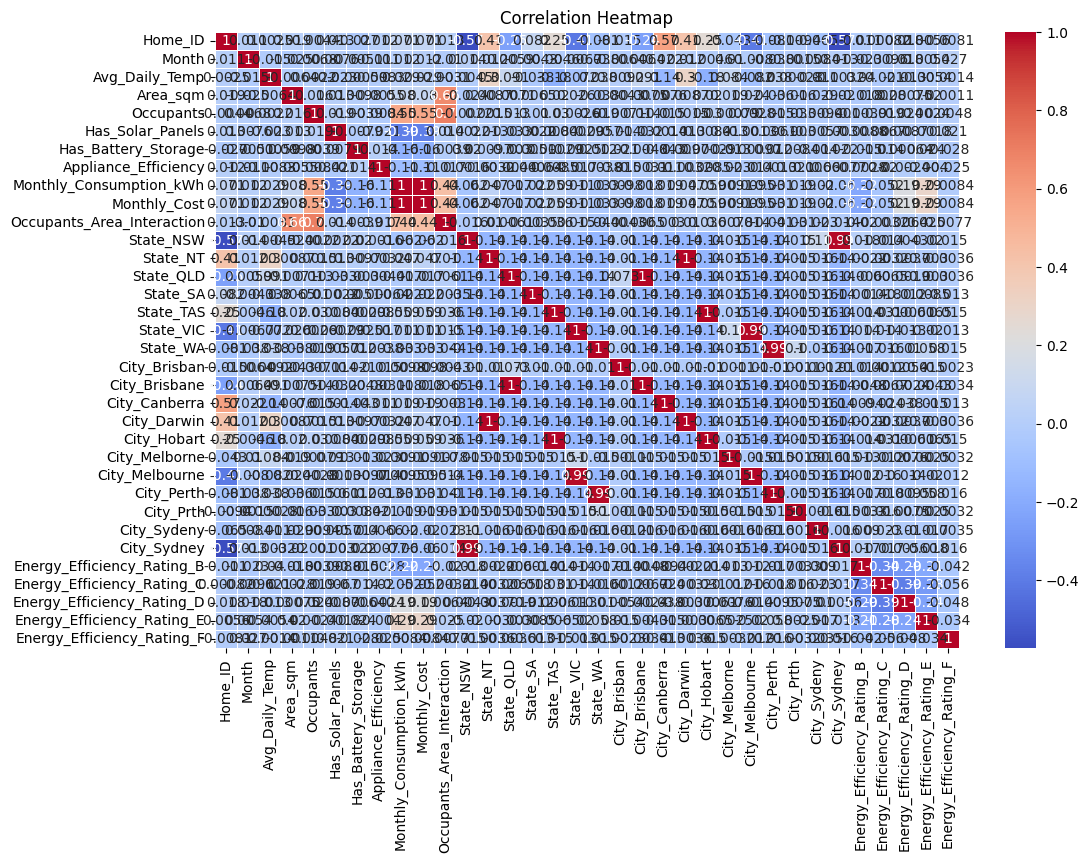

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot a correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(data_cleaned.corr(), annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()


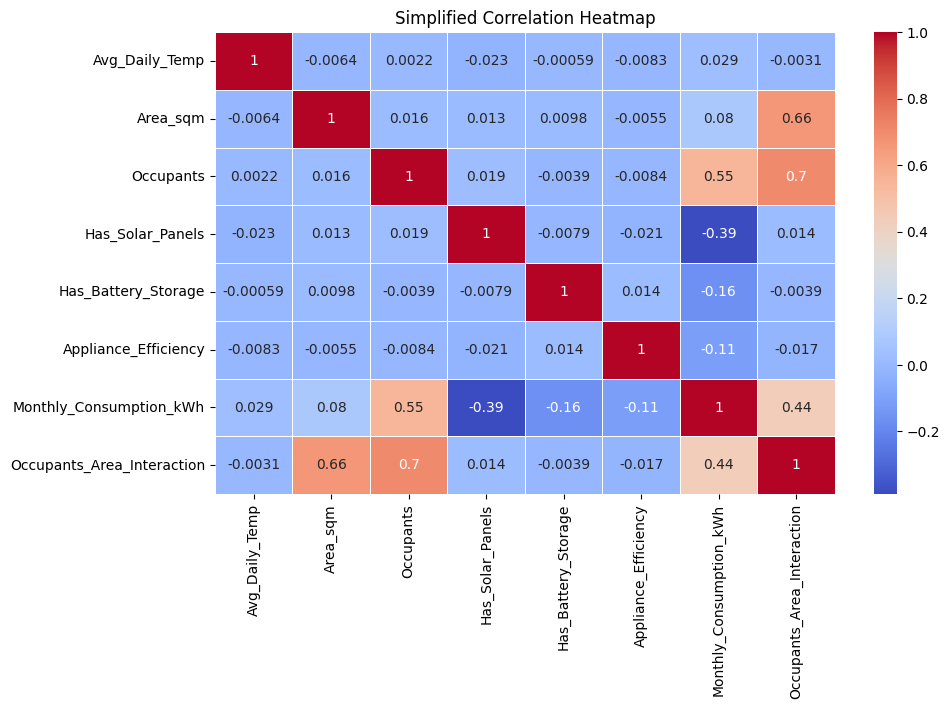

In [9]:
# Select relevant columns for the heatmap
relevant_columns = ['Avg_Daily_Temp', 'Area_sqm', 'Occupants', 'Has_Solar_Panels', 
                    'Has_Battery_Storage', 'Appliance_Efficiency', 'Monthly_Consumption_kWh',
                    'Occupants_Area_Interaction']

# Generate the simplified correlation matrix
plt.figure(figsize=(10, 6))
sns.heatmap(data_cleaned[relevant_columns].corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Simplified Correlation Heatmap')
plt.show()


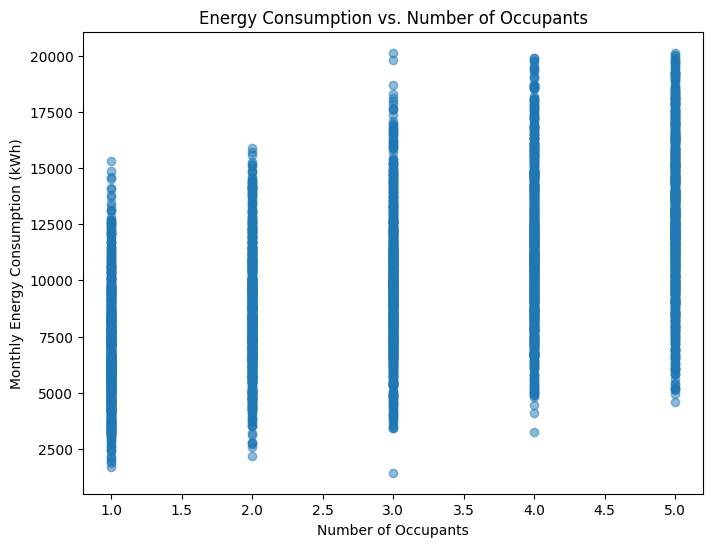

In [10]:
# Scatter plot: Occupants vs. Monthly_Consumption_kWh
plt.figure(figsize=(8, 6))
plt.scatter(data_cleaned['Occupants'], data_cleaned['Monthly_Consumption_kWh'], alpha=0.5)
plt.title('Energy Consumption vs. Number of Occupants')
plt.xlabel('Number of Occupants')
plt.ylabel('Monthly Energy Consumption (kWh)')
plt.show()


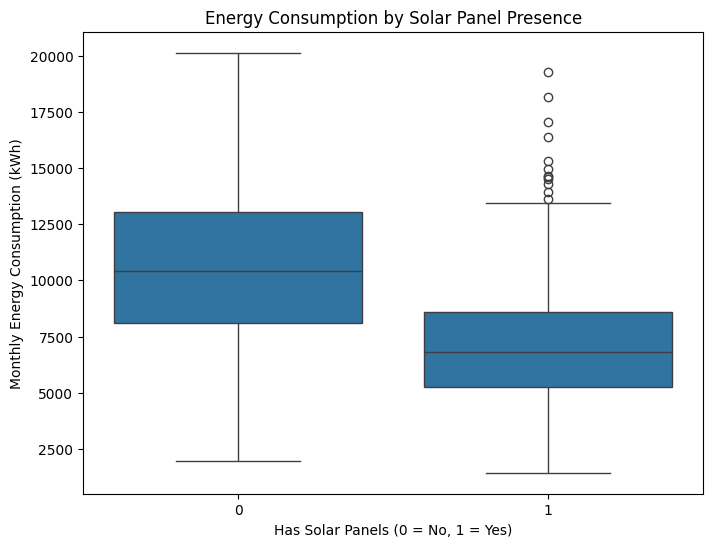

In [11]:
# Box plot for Has_Solar_Panels vs. Monthly Consumption
plt.figure(figsize=(8, 6))
sns.boxplot(x='Has_Solar_Panels', y='Monthly_Consumption_kWh', data=data_cleaned)
plt.title('Energy Consumption by Solar Panel Presence')
plt.xlabel('Has Solar Panels (0 = No, 1 = Yes)')
plt.ylabel('Monthly Energy Consumption (kWh)')
plt.show()


In [12]:
from sklearn.preprocessing import StandardScaler

# Initialize the scaler
scaler = StandardScaler()

# Define the feature matrix X and the target variable y
X = data_cleaned.drop(columns=['Monthly_Consumption_kWh'])  # Exclude target variable
y = data_cleaned['Monthly_Consumption_kWh']

# Scale the feature matrix
X_scaled = scaler.fit_transform(X)


In [13]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Display the shape of the train and test sets to verify the split
print(f"Training set: {X_train.shape}, Testing set: {X_test.shape}")


Training set: (3149, 33), Testing set: (788, 33)


In [14]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Initialize the vanilla linear regression model
vanilla_model = LinearRegression()

# Train the model on the training data
vanilla_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred_vanilla = vanilla_model.predict(X_test)

# Evaluate the model using Mean Squared Error (MSE) and R-squared (R²)
mse_vanilla = mean_squared_error(y_test, y_pred_vanilla)
r2_vanilla = r2_score(y_test, y_pred_vanilla)

print(f"Vanilla Linear Regression MSE: {mse_vanilla}")
print(f"Vanilla Linear Regression R²: {r2_vanilla}")


Vanilla Linear Regression MSE: 0.002065587891813264
Vanilla Linear Regression R²: 0.9999999998486683


In [15]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

# Perform grid search to find the best alpha for Ridge
ridge_params = {'alpha': [0.01, 0.1, 1, 10, 100]}
ridge_model = GridSearchCV(Ridge(), ridge_params, cv=5)
ridge_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred_ridge = ridge_model.predict(X_test)

# Evaluate the Ridge model
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
r2_ridge = r2_score(y_test, y_pred_ridge)

print(f"Ridge Regression MSE: {mse_ridge}")
print(f"Ridge Regression R²: {r2_ridge}")


Ridge Regression MSE: 0.0026484830604433713
Ridge Regression R²: 0.9999999998059635


In [16]:
from sklearn.linear_model import Lasso

# Perform grid search to find the best alpha for Lasso
lasso_params = {'alpha': [0.01, 0.1, 1, 10, 100]}
lasso_model = GridSearchCV(Lasso(), lasso_params, cv=5)
lasso_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred_lasso = lasso_model.predict(X_test)

# Evaluate the Lasso model
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
r2_lasso = r2_score(y_test, y_pred_lasso)

print(f"Lasso Regression MSE: {mse_lasso}")
print(f"Lasso Regression R²: {r2_lasso}")


Lasso Regression MSE: 0.43928374503439477
Lasso Regression R²: 0.999999967816646


In [17]:
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_squared_error, r2_score

# Initialize ElasticNet with both L1 and L2 regularization
elastic_net_model = ElasticNet(alpha=0.1, l1_ratio=0.5)  # l1_ratio controls the mix of Lasso and Ridge
elastic_net_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_elastic = elastic_net_model.predict(X_test)

# Evaluate the model performance
mse_elastic = mean_squared_error(y_test, y_pred_elastic)
r2_elastic = r2_score(y_test, y_pred_elastic)

# Display the results
print(f"ElasticNet MSE: {mse_elastic}")
print(f"ElasticNet R-Squared: {r2_elastic}")


ElasticNet MSE: 66244.12967317499
ElasticNet R-Squared: 0.9951467398939011


In [18]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid for ElasticNet
param_grid = {
    'alpha': [0.01, 0.1, 1, 10],
    'l1_ratio': [0.1, 0.5, 0.7, 0.9]
}

# Initialize ElasticNet model
elastic_net_model = ElasticNet()

# Perform grid search with cross-validation
grid_search = GridSearchCV(estimator=elastic_net_model, param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Best parameters
print(f"Best parameters found: {grid_search.best_params_}")

# Evaluate the best model
best_model = grid_search.best_estimator_
y_pred_best = best_model.predict(X_test)
print(f"Best ElasticNet MSE: {mean_squared_error(y_test, y_pred_best)}")
print(f"Best ElasticNet R-Squared: {r2_score(y_test, y_pred_best)}")


Best parameters found: {'alpha': 0.01, 'l1_ratio': 0.9}
Best ElasticNet MSE: 44.22596422104792
Best ElasticNet R-Squared: 0.9999967598622117
